In [2]:
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [3]:
text_csv_path = "../../data/labelled_text.csv"

In [4]:
df = pd.read_csv(text_csv_path, encoding='ISO-8859-1', header=None,)

In [5]:
df

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [21]:
df = df[df[2] != "Irrelevant"]

In [7]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [22]:
texts = df[3]

In [23]:
tokenized = []
for text in texts:
    if isinstance(text, str):
        tokenized.append(tokenizer.encode(text))

In [24]:
from collections import defaultdict

In [25]:
d = defaultdict(lambda : 0)

In [26]:
for tokenized_text in tokenized:
    d[len(tokenized_text)] += 1

In [27]:
keys, values = list(d.keys()), list(d.values())

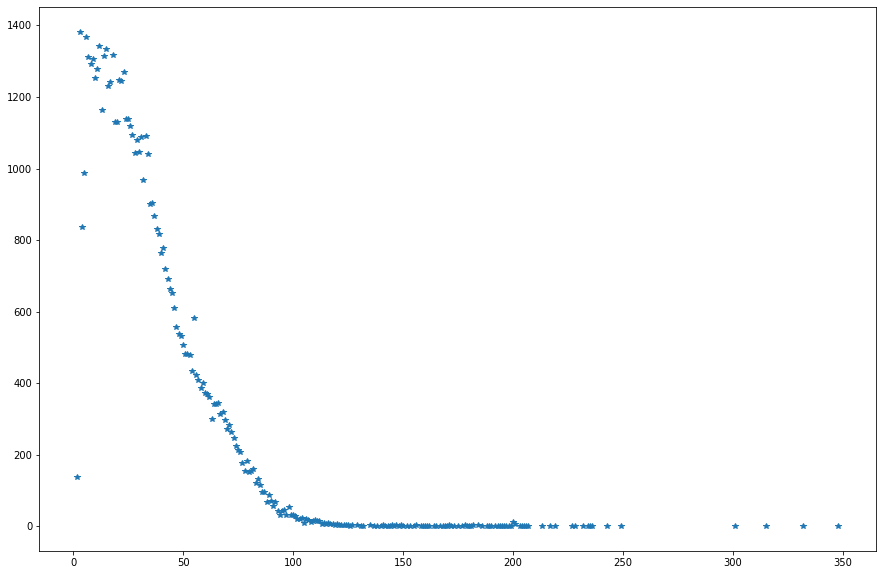

In [28]:
plt.figure(figsize=(15, 10))
plt.plot(keys, values, '*')
plt.show()